### **Saudi Arabia Used Cars**

[Sumber data Saudi Arabia Used Cars](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

by : Refno Devianto

### **1. Business Problem Understanding**

**Context**

Berdasarkan Analisis Pasar Mobil Bekas Arab Saudi yang didapat dari [Mordor Intelligence](https://www.mordorintelligence.com/industry-reports/saudi-arabia-used-car-market#:~:text=Saudi%20Arabia%20Used%20Car%20Market%20Analysis,7.36%25%20over%20the%20forecast%20period). Pasar Mobil Bekas Arab Saudi memiliki nilai sebesar 4,91 miliar dolar AS pada tahun 2021 dan diperkirakan akan mencapai valuasi bersih sebesar 8,69 miliar dolar AS pada akhir tahun 2027, dengan pertumbuhan CAGR yang solid sebesar 7,36% selama periode perkiraan.

Meskipun Saudi adalah negara terbesar kelima di Asia dan salah satu negara kunci di Timur Tengah. Wilayah ini selalu mendukung adopsi mobil bekas / bekas karena meningkatnya permintaan untuk mobil mewah yang terjangkau di segmen mobil bekas. Konsumen di Arab Saudi lebih memilih mobil bekas daripada mobil baru karena mobil-mobil ini menawarkan Price yang lebih baik, pembiayaan yang mudah, dan dukungan perawatan purnajual. Para pemain termasuk anggota terorganisir dan tidak terorganisir yang menawarkan kendaraan menyediakan program keterlibatan konsumen dan menawarkan diskon yang kompetitif untuk mempromosikan penjualan mobil bekas di Arab Saudi. Mempertimbangkan faktor-faktor utama ini, permintaan mobil bekas di Arab Saudi diperkirakan akan tetap tinggi selama periode perkiraan.

Pasar mobil bekas adalah pasar yang tidak menentu. Pasar mobil bekas berfluktuasi berdasarkan sejumlah faktor, baik yang nyata (atau dalam beberapa kasus yang dibayangkan) seperti halnya pasar lainnya. Setelah pasar yang booming, tampaknya Price mobil bekas akan segera turun. Jadi, masalahnya adalah bagaimana cara mendapatkan Price terbaik untuk menjual atau membeli agar kita tidak salah mengambil keputusan. Berdasarkan hal tersebut, kita mungkin harus memprediksi Price mobil bekas pada dataset yang berisi fitur (variabel) di dalamnya.


**Problem Statement**

Permasalahan terbesar dari Pasar Mobil Bekas adalah bagaimana cara menjual mobil bekas di Arab Saudi sehingga mereka tidak menjualnya dengan Price yang terlalu tinggi atau terlalu rendah. Price yang terlalu tinggi akan membuat konsumen tidak tertarik untuk membeli mobil tersebut, sedangkan Price yang terlalu rendah akan membuat mereka merugi.

Marketplace pasti menginginkan keuntungan yang besar dengan menjual Price mobil bekas dengan Price yang tetap berdasarkan tipe, jarak tempuh, opsi, dll. Bagaimana cara membuat Price yang kompetitif adalah salah satu masalah untuk mendapatkan keuntungan besar pada bisnis mereka.

**Goals**

Berdasarkan permasalahan tersebut, marketplace tentu perlu memiliki toll/alat yang dapat memprediksi `Price` mobil bekas untuk menentukan Price terbaik dalam menjual mobil bekas. Hal ini akan menyulitkan para marketplace untuk mengambil keputusan sendiri karena banyaknya jenis, variasi mobil, tipe mobil, dan lain-lain. Dengan Prediksi ini, mungkin akan menjadi alat bantu bagi pemangku kepentingan / pasar untuk membuat keputusan.

**Analytic Approach**

Melalui permasalahan ini, kita akan menganalisa data untuk dapat menemukan pola-pola fitur yang ada yang membedakan satu mobil dengan mobil lainnya.

Selanjutnya, kita akan membuat model regresi untuk membantu marketplace sebagai alat untuk membuat keputusan yang lebih baik dan terbaik dalam memprediksi Price mobil bekas. Tentunya kami ingin membuat model yang baik untuk membantu marketplace dan memuaskan pelanggan untuk membeli di channel mereka.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi Price Mobil Bekas sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **2. Data Understanding**

Pada langkah ini, kita akan memahami data seperti; membaca dataset, memberikan deskripsi variabel (atribut data) untuk mencari aset data yang lebih baik dan mengelolanya.

- Dataset merupakan data listing Saudi Arabia Used Cars yang di kumpulkan dari syarah.com.
- Setiap baris data merepresentasikan informasi sebuah mobil bekas.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Jenis Mobil Bekas |
| Region | Object | Wilayah Tempat Mobil Bekas ditawarkan Untuk di Jual |
| Make | Object | Nama Perusahaan pembuat Mobil Bekas |
| Gear_Type | Object | Jenis Transmisi Mobil Bekas |
| Origin | Object | Asal Mobil Bekas |
| Option | Object | Pilihan Mobil Bekas |
| Year | int64 | Tahun Pembuatan Mobil Bekas |
| Engine_Size | Float | Ukuran Mesin Mobil Bekas |
| Mileage | Integer | Jarak Tempuh Mobil Bekas |
| Negotiable | Boolean | Status negosiasi mobil bekas, Benar jika harganya 0, artinya masih bisa dinegosiasikan |
| Price | Integer | Harga Mobil Bekas (dalam Riyal) |

<br>

Kolom `Price` adalah target kita karena kita ingin memprediksinya price use cars. Sedangkan kolom-kolom lainnya akan menjadi variabel prediktor kita untuk memprediksi `price`


In [106]:
# Import library yang dibutuhkan untuk eksplorasi dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')


# To change Scientific Notation to Decimal Format
pd.options.display.float_format = '{:.1f}'.format

### Read the dataset

In [107]:
# Load dataset
df = pd.read_csv('D:/Data Scince Purwadhika/Modul 3/Capstone_Project_Module_3/data_saudi_used_cars.csv')
df.head()


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [108]:
# Check datatype for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


#### **Exploratory Data Analysis**

Exploratory data analysis digunakan untuk memeriksa data dan mendapatkan insight. Ini akan memberikan pemahaman dasar tentang data kita, distribusinya, nilai null, dan banyak lagi. Jadi, kita akan melakukan Exploratory Data Analysis (EDA) pada data untuk pemahaman yang lebih baik.

Seperti yang telah disebutkan sebelumnya, kolom `Price` adalah variabel target dan kolom-kolom lainnya adalah variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Berikut ini kita pisahkan masing-masing tipe variabel itu sendiri:

- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

Untuk Numerical Variabels, kita dapat memperoleh wawasan dan korelasi dengan menggunakan Pair Plot. Karena Pair Plot menampilkan grafik pasangan untuk semua variabel numerikal dalam daftar, dan kita dapat melihat korelasi antara variabel numerikal.

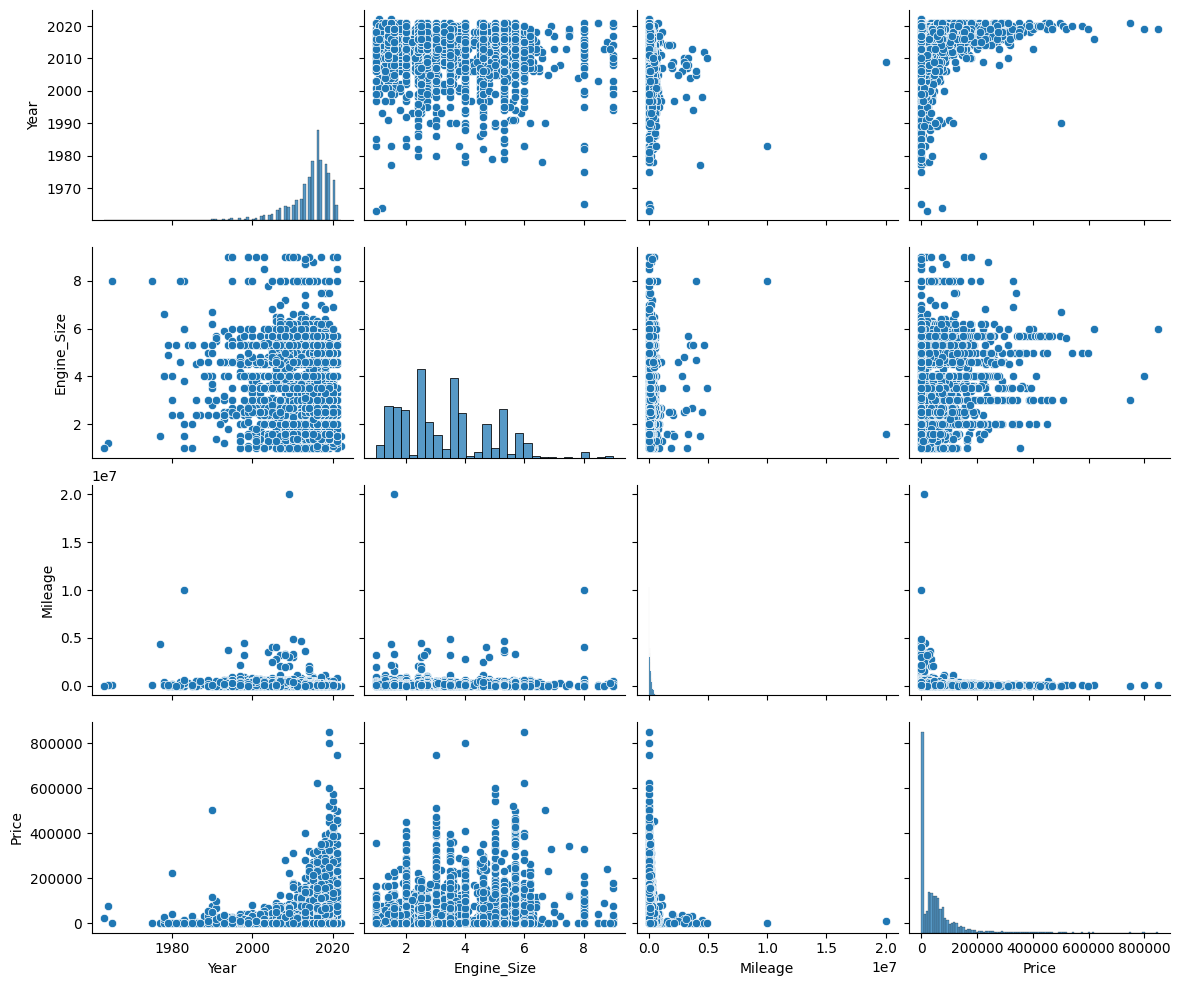

In [109]:
# Pairplot untuk semua variabel numerik
sns.pairplot(df[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

**Insight** : 

Seperti yang dapat kita lihat dari grafik Pairplot di atas, terdapat korelasi tinggi dan korelasi rendah antara variabel-variabel satu sama lain.
- **Year** : Engine_Size (Korelasi Rendah), Mileage (Korelasi Tinggi), Price (Korelasi Tinggi)
- **Engine_Size** : Year (Korelasi Rendah), Mileage (Korelasi Rendah), Price (Korelasi Rendah)
- **Mileage** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Price (Korelasi Rendah)
- **Price** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Mileage (Korelasi Rendah) 

**Categorical Variabels**

Untuk Variabel Kategorikal, kita akan menganalisis nilai pada setiap kategori untuk mengeksplorasi dan meringkas kategori itu sendiri. Kita akan melakukan pemeringkatan dan menghitungnya, sehingga kita dapat melihat perusahaan apa yang paling banyak menjual mobil bekas, jenis mobil bekas apa yang paling banyak, daerah mana yang paling banyak menggunakan mobil bekas, dari mana asal mobil bekas tersebut, dll.

In [110]:
import plotly.graph_objects as go
import plotly.express as px

**Distribution of Saudi Used Cars Price**

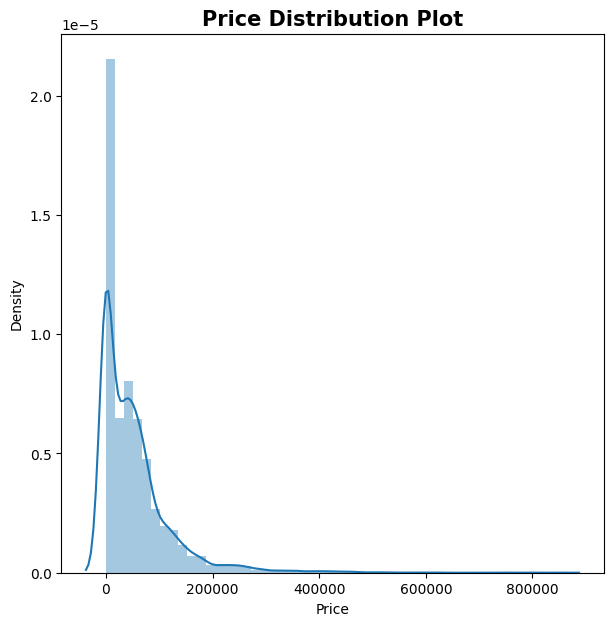

In [111]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Gambar diatas menunjukkan bahwa `Price` dari used car memiliki `right-skewed distribution` atau dapat dikatakan positively skewed yang berarti nilai mean > median > mode

**Top 10 Company of Used Cars & Top 10 Type of Used Cars**

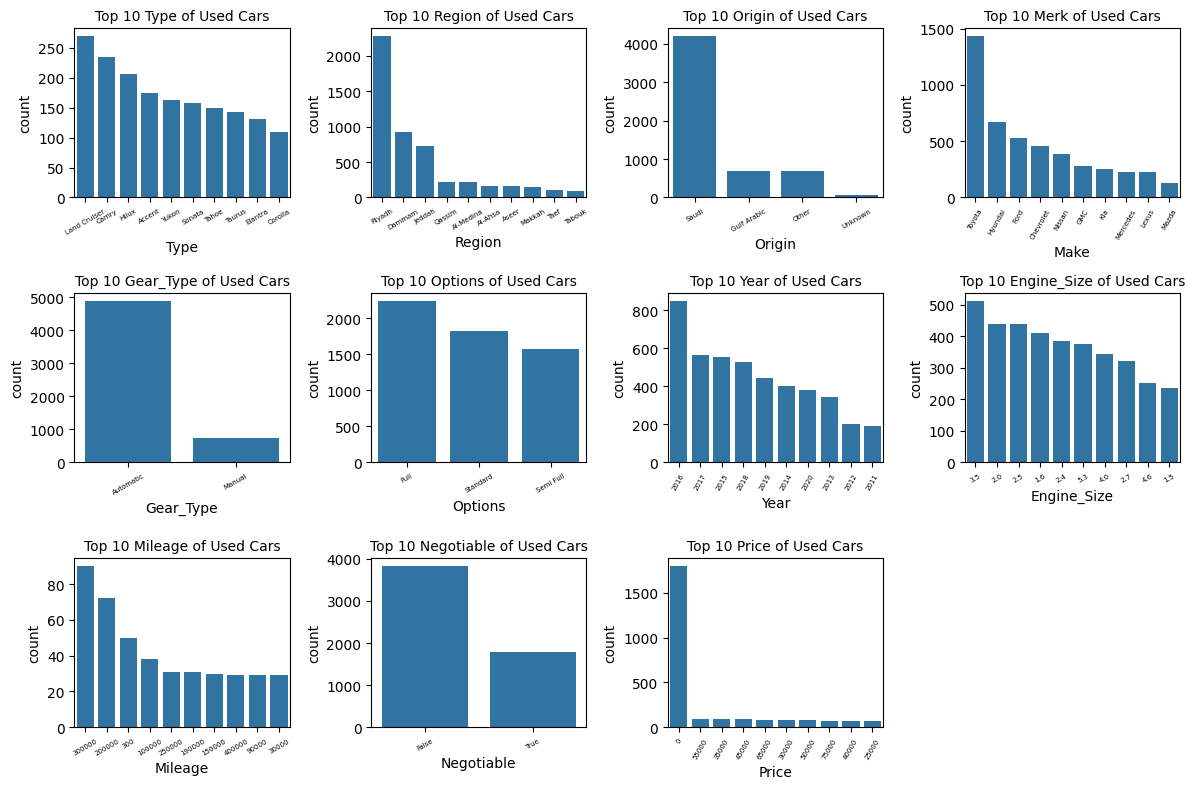

In [112]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas

plt.figure(figsize=(12,8))

plt.subplot(3,4,1)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,2)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,3)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().iloc[:10].index)
plt.title('Top 10 Origin of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,4)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Merk of Used Cars', size = 10)
plt.xticks(rotation = 60, size = 5)

plt.subplot(3,4,5)
sns.countplot(x=df['Gear_Type'], order = df['Gear_Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Gear_Type of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,6)
sns.countplot(x=df['Options'], order = df['Options'].value_counts().iloc[:10].index)
plt.title('Top 10 Options of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,7)
sns.countplot(x=df['Year'], order = df['Year'].value_counts().iloc[:10].index)
plt.title('Top 10 Year of Used Cars', size = 10)
plt.xticks(rotation = 60, size = 5)

plt.subplot(3,4,8)
sns.countplot(x=df['Engine_Size'], order = df['Engine_Size'].value_counts().iloc[:10].index)
plt.title('Top 10 Engine_Size of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,9)
sns.countplot(x=df['Mileage'], order = df['Mileage'].value_counts().iloc[:10].index)
plt.title('Top 10 Mileage of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,10)
sns.countplot(x=df['Negotiable'], order = df['Negotiable'].value_counts().iloc[:10].index)
plt.title('Top 10 Negotiable of Used Cars', size = 10)
plt.xticks(rotation = 30, size = 5)

plt.subplot(3,4,11)
sns.countplot(x=df['Price'], order = df['Price'].value_counts().iloc[:10].index)
plt.title('Top 10 Price of Used Cars', size = 10)
plt.xticks(rotation = 60, size = 5)


plt.tight_layout()
plt.show()

Grafik di atas menunjukkan kepada kita bahwa Toyota adalah yang paling banyak memproduksi mobil bekas dibandingkan perusahaan lainnya. Hal ini sangat berkaitan karena dalam 10 besar jenis mobil bekas diisi oleh mobil Toyota (Land Cruiser, Campry, Hilux & Corolla). Di sisi lain, Hyundai menjadi perusahaan yang paling banyak memproduksi mobil bekas dengan tipe Accent, Sonata dan Elantra. Jadi, berdasarkan grafik ini kita dapat melihat korelasi antara **Variabel Kategorikal**; Merek dan Tipe.

Selain itu, mobil bekas banyak berasal dari Saudi Arabia, dan paling banyak di jual di wilayah Riyadh. Dari segi Mobil bekas, Mobil bekas banyak bersalah dari tahun pembuatan 2016, disusul dengan tahun pembuatan 2017, 2015 dan 2018. Untuk Jenis Gear paling banyak yaitu AuAutomatic, serta pilihan Mobil Bekas terdiri dari Full (2233), Standard (1822) and Semi Full (1569).

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [113]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [114]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Stinger, GLC]"
1,Region,object,0,0.0,27,"[Besha, Jeddah]"
2,Make,object,0,0.0,58,"[INFINITI, Aston Martin]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Other, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Standard, Semi Full]"
6,Year,int64,0,0.0,50,"[2007, 1963]"
7,Engine_Size,float64,0,0.0,71,"[7.5, 8.0]"
8,Mileage,int64,0,0.0,1716,"[10700, 310000]"
9,Negotiable,bool,0,0.0,2,"[False, True]"



Table data diatas menunjukkan bahwa dataset yang digunakan tidak memiliki missing value, namun apabila melihat 'unique' value pada feature `Origin` terdapat value `unknown` dan `others`. Jadi kita akan mengubah nilai Unknown menjadi Other dimana kita menganggap memiliki artinya yang sama.

In [115]:
# Replace 'Unknown' to 'Other' on Origin variable
df_model['Origin'] = df_model['Origin'].replace('Unknown','Other')

In [116]:
df_model['Origin'].value_counts()

Origin
Saudi          4188
Other           739
Gulf Arabic     697
Name: count, dtype: int64

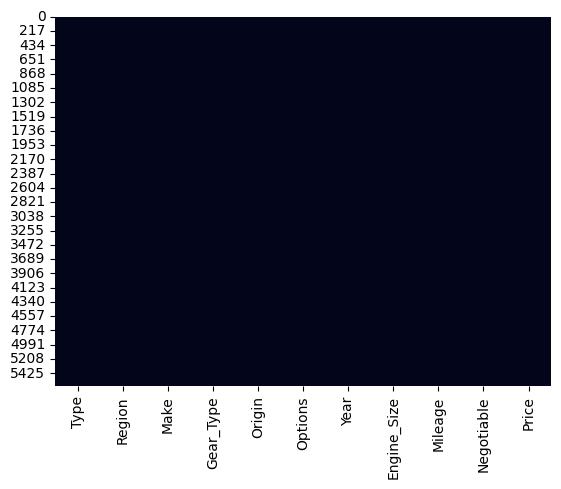

In [117]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Dari informasi dataset di atas, dapat terlihat bahwa tidak ada missing value dalam dataset. Namun, kita tetap harus memperhatikan dalam mengambil keputusan terbaik untuk model.

Kita juga harus memeriksa adanya data duplikat dalam dataset. Duplikat berarti kita memiliki data yang berulang dalam dataset. Hal ini bisa disebabkan oleh kesalahan penginputan data atau metode pengumpulan data. Menghapus data duplikat akan membantu kita membuat observasi yang terbaik dari dataset yang kita miliki.


In [118]:
# Check for duplicated rows
print("Number of duplicate rows: ", sum(df_model.duplicated()))


Number of duplicate rows:  4


Terdapat 4 baris yang duplikasi. Jadi kita harus menghapus (drop) baris yang terduplikasi untuk mendapatkan data yang bersih seperti yang kita inginkan.

In [119]:
# Drop duplicated rows
df_model.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", sum(df_model.duplicated()))

Number of duplicate rows:  0


Setelah kita menghapus baris yang terduplikasi, kita harus mempertimbangkan untuk menghapus kolom yang tidak akan kita gunakan di masa depan. Baris yang kita hapus adalah baris yang tidak memiliki relevansi yang besar dengan kolom lain atau model kita.
- Berdasarkan pengetahuan domain, kolom `Negotiable` tidak memiliki relevansi yang besar dengan kolom lainnya. Oleh karena itu, kita akan membuang kolom `Negotiable` terlebih dahulu
- Kami juga membatasi nilai ekstrim dari variabel yang dapat mempengaruhi model kami lebih lanjut **berdasarkan pengetahuan*.

### Delete unnecassarry column

Pada langkah ini, kita akan menghapus kolom yang tidak perlu yang menurut kita tidak terlalu berpengaruh pada dataset kita dan ini bisa jadi berdasarkan pengetahuan kita. Sejauh yang kami ketahui, bahwa `Negotiable` tidak terlalu berpengaruh pada variabel lainnya (Type - Negotiable, Region - Negotiable, Year - Negotiable). Berdasarkan hal ini, kita dapat menghapus (drop) variabel 'Negotiable' karena hal ini dapat memberikan terlalu banyak informasi (overfitting) pada model kita.

In [120]:
# Delete unnecasarry column (Negotiable) for analysis
df_model = df_model.drop(['Negotiable'], axis=1)
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


Seperti yang telah disebutkan sebelumnya, kolom `Price` memiliki beberapa nilai 0, yang mana hal ini tidak mungkin terjadi. Untuk anomali ini, kita akan menghapus baris `Price` yang berisi nilai 0

In [121]:
# Check rows with Price represented as'0'
print("Number of Price with 0 value : ",df_model[df_model['Price'] == 0]['Price'].count())

Number of Price with 0 value :  1796


Karena variabel `Price` yang bernilai 0 sebanyak 1796 data (31,93% dari keseluruhan data yaitu 5624), maka kita harus membuang variabel `Price` yang bernilai 0 karena hal ini akan berpengaruh pada model kita selanjutnya.

In [122]:
# Delete rows with Price represented as'0' and View another view the anomaly
df_model = df_model[df_model['Price'] != 0]
df_model.sort_values(by='Price', ascending=1, inplace=True)
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


Dari tabel di atas, kita dapat melihat bahwa tidak ada lagi nilai 0 pada kolom `Price`. Tetapi kita dapat melihat bahwa data kita mungkin memiliki anomali lain. Tidak mungkin menjual Mobil Bekas; **Yukon - Auto - 2019 - 5.3 - 50000 mil** seharga 1 dolar. Untuk Anomali ini, kami akan memotong nilai ekstrim yang berada di luar kisaran yang diharapkan dan tidak seperti data lainnya.
Kami akan mendeskripsikan & memplot kolom `Price` pada dataset, sehingga kami dapat melihat resume.

Menurut penelusuran saya ke www.edmunds.com mengatakan bahwa setiap mobil memiliki pencapaian jarak tempuh. Singkatnya, salah satu faktor utama yang mempengaruhi Price kendaraan bekas adalah `Mileage`. Berdasarkan fakta tersebut, kita dapat mengatakan bahwa jarak tempuh benar-benar mempengaruhi Price mobil bekas. Yang terpenting, kita akan melihat pencilan dari setiap variabel numerik sehingga kita dapat memutuskan apa yang akan kita lakukan pada langkah selanjutnya.

In [123]:
# Recheck the dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, 3131 to 3513
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3824 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Price        3824 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.6+ KB


### Find the outliers

Sebelum kita memotong data, kita akan menemukan pencilan terlebih dahulu. Pencilan benar-benar berdampak pada kumpulan data kita. Hal ini akan meningkatkan varians kesalahan dan mengurangi kekuatan uji statistik. Hal ini dapat menyebabkan bias dan / atau mempengaruhi estimasi. Hal ini juga dapat mempengaruhi asumsi dasar regresi serta model statistik lainnya.

Namun tantangannya adalah; bagaimana kita dapat mendeteksi outlier? apakah ada outlier positif dan outlier negatif pada dataset kita? bagaimana kita memotong outlier & membersihkan dataset tanpa membuat data kita kehilangan banyak informasi. Hal ini akan dibahas pada proyek kami di bawah ini.

Di sini kita akan melihat plot distribusi untuk setiap variabel numerik dari dataset sebelum kita memutuskan baris dan kolom mana yang ingin kita potong yang mungkin mengandung pencilan.

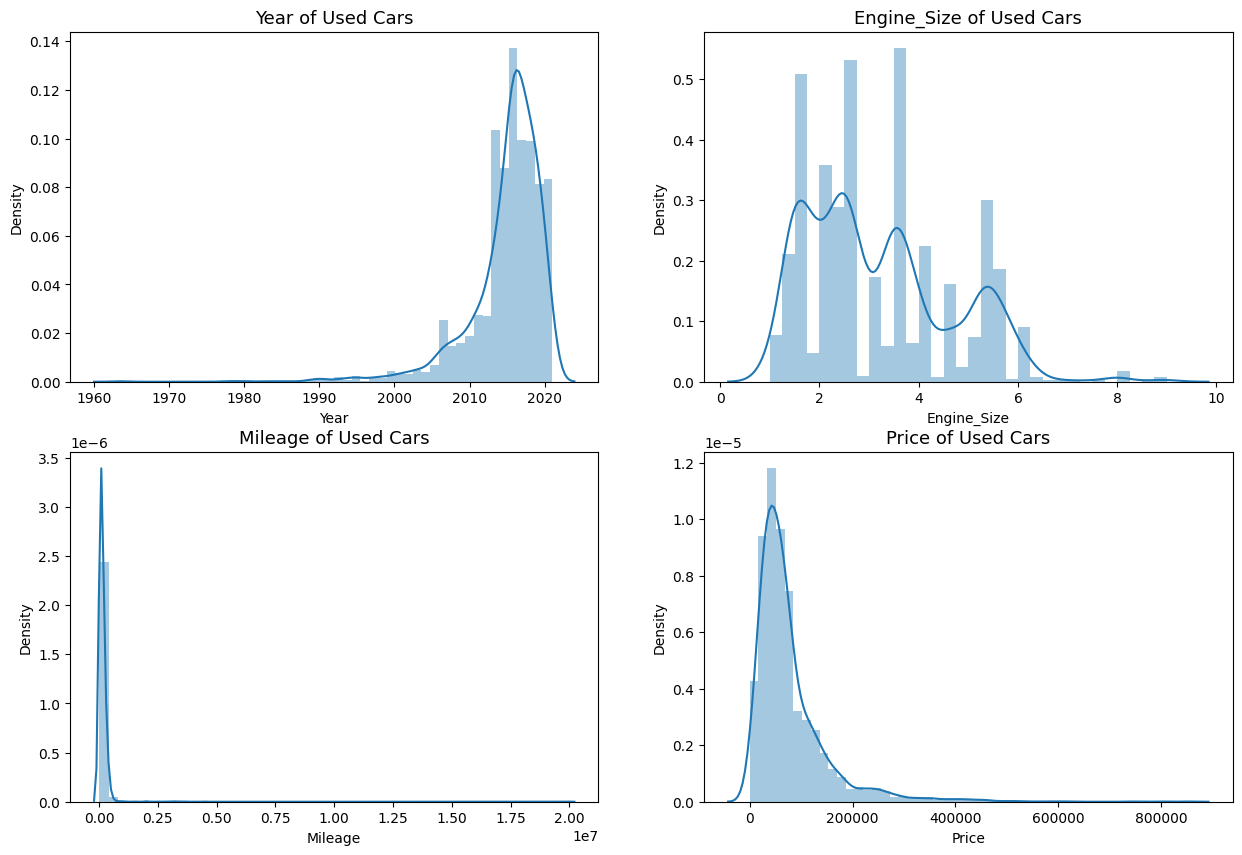

In [124]:
# Show distribution plot for each numerical variabel on dataset
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(df_model['Year'])
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(df_model['Engine_Size'])
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(df_model['Mileage'])
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(df_model['Price'])
plt.title('Price of Used Cars',fontsize=13)

plt.show()

In [125]:
# Additional information for the graph
from scipy.stats import skew
from scipy.stats import kurtosis

print("Year Skew :",skew(df_model["Year"]), ", Year Kurtosis :",kurtosis(df_model["Year"]))
print("Engine_Size Skew :",skew(df_model["Engine_Size"]), ", Engine_Size Kurtosis :",kurtosis(df_model["Engine_Size"]))
print("Mileage Skew :",skew(df_model["Mileage"]), ", Mileage Kurtosis :",kurtosis(df_model["Mileage"]))
print("Price Skew :",skew(df_model["Price"]), ", Price Kurtosis :",kurtosis(df_model["Price"]))

Year Skew : -2.645640967990875 , Year Kurtosis : 12.440303365812376
Engine_Size Skew : 0.7170561392706625 , Engine_Size Kurtosis : -0.059362333134416634
Mileage Skew : 39.422345261243805 , Mileage Kurtosis : 1995.333501937911
Price Skew : 3.096416044314816 , Price Kurtosis : 15.590055086179994


Year Skew: -2.645640967990875
Year Kurtosis: 12.440303365812376

Skewness Year yang negatif (-2.65) menunjukkan bahwa distribusi tahun pembuatan mobil cenderung condong ke kiri, artinya, nilai-nilai lebih banyak terkonsentrasi di tahun yang lebih baru. Kurtosis yang relatif tinggi (12.44) menunjukkan bahwa distribusi memiliki ekor yang lebih tebal dan puncak yang lebih tajam daripada distribusi normal.

Engine_Size Skew: 0.7170561392706615
Engine_Size Kurtosis: -0.05936233313441841

Skewness Engine_Size yang positif (0.72) menunjukkan bahwa distribusi ukuran mesin cenderung condong ke kanan, artinya, ukuran mesin yang lebih besar lebih umum. Kurtosis yang mendekati nol (-0.06) menunjukkan bahwa distribusi mesin ukuran tersebut hampir simetris secara normal.

Mileage Skew: 39.42234526124381
Mileage Kurtosis: 1995.333501937911

Skewness Mileage yang sangat tinggi (39.42) menunjukkan distribusi yang sangat condong ke kiri, dengan sebagian besar mobil memiliki jarak tempuh yang rendah. Kurtosis yang sangat tinggi (1995.33) menunjukkan distribusi dengan ekor yang sangat tebal dan puncak yang sangat tinggi, bahkan lebih jauh daripada distribusi normal.

Price Skew: 3.096416044314816
Price Kurtosis: 15.590055086179994

Skewness Price yang tinggi (3.10) menunjukkan bahwa distribusi Price mobil cenderung condong ke kanan, dengan Price yang lebih tinggi menjadi lebih umum. Kurtosis yang tinggi (15.59) menunjukkan distribusi dengan ekor yang lebih tebal dan puncak yang lebih tinggi daripada distribusi normal.

<Figure size 800x600 with 0 Axes>

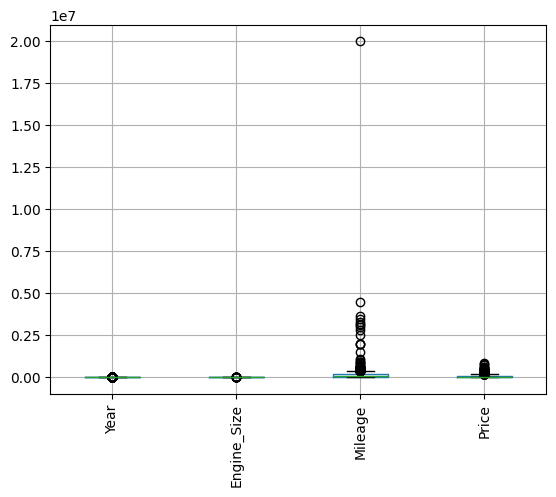

<Figure size 800x600 with 0 Axes>

In [126]:
# Check the outliers for numerical variabel
df_model.boxplot(rot=90)
plt.figure(figsize = (8,6))

Seperti yang kita ketahui dan lihat, variabel `Mileage` dan `Price` memiliki pencilan. Ada nilai yang sangat besar pada `Mileage`, dan `Price` tidak mungkin menjual mobil bekas hanya dengan Price 1 dolar. Pencilan ini akan berdampak pada analisis dan model data kita. Kami akan menangani pencilan ini untuk mendapatkan model terbaik.

Pertama, kita akan mendeskripsikan variabel numerik untuk melihat deskriptif setiap data numerik ke persentil sehingga kita dapat menentukan perlakuan terhadap pencilan ini. **Kami akan menghitung 5 persentil min-max dari setiap variabel numerik untuk melihat variasi dari data itu sendiri.

In [127]:
### Decribe the model percentiles
df_model.describe(percentiles = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

,Year,Engine_Size,Mileage,Price
count,3824.0,3824.0,3824.0,3824.0
mean,2014.9,3.2,142621.1,78019.2
std,5.1,1.5,378394.2,72748.2
min,1963.0,1.0,100.0,1.0
5%,2006.0,1.4,276.0,14000.0
10%,2009.0,1.5,4895.1,21000.0
20%,2013.0,1.8,33000.0,30000.0
30%,2014.0,2.2,61000.0,40000.0
40%,2015.0,2.5,83000.0,48600.0
50%,2016.0,2.7,103000.0,58000.0


Setelah kita melihat deskripsi dan persentil dari setiap variabel numerik, kita harus membuat boxplot dan mendeskripsikan pencilan berdasarkan hasil boxplot dari setiap variabel numerik, sehingga kita dapat melihat pencilan secara tepat pada masing-masing variabel.

In [128]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

**- Year**

<Axes: xlabel='Year'>

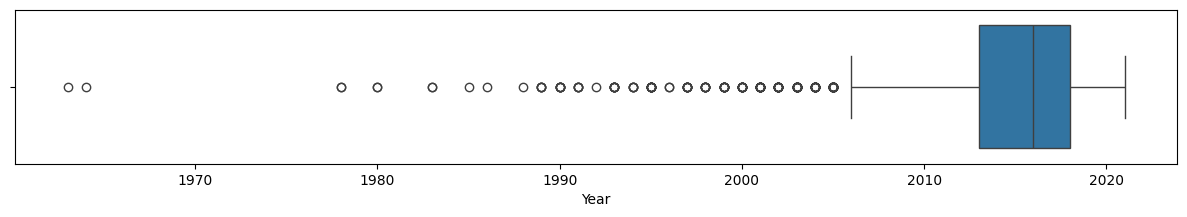

In [129]:
# Check the 'Year' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Year"])

In [130]:
find_anomalies(df_model['Year'])

IQR: 5.0
limit_bawah: 2005.5
limit_atas: 2025.5


In [131]:
# Asumsi penjualan mobil bekas biasa, tidak ada classic car
df_model[df_model['Year'] < 2000].count()['Year']

74

In [132]:
df_model[df_model['Year'] > 2021].count()['Year']

0

- Jika kita melihat nilai maksimum, terlihat bahwa tahunnya adalah 2021.
- Mengingat peraturan pemerintah Saudi Arabia, mobil bekas yang diperbolehkan adalah yang berusia kurang dari 7 tahun, namun hal ini dapat mengakibatkan kehilangan banyak data.
- Selain itu, kita berasumsi bahwa mobil yang dijual adalah mobil biasa, bukan mobil klasik.
- Dengan mempertimbangkan ketiga hal tersebut, kita membatasi tahun mobil dengan rentang 2000 hingga 2021.

Text(0.5, 0, 'Range Selected Year')

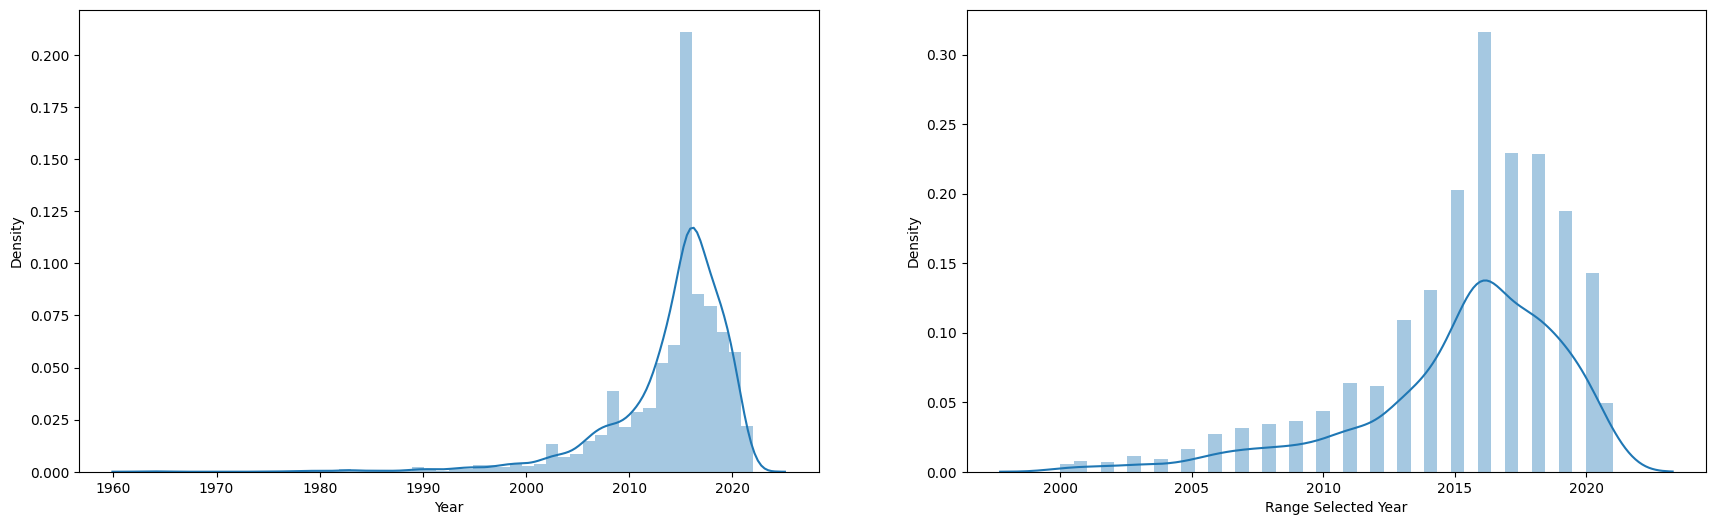

In [133]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Year'] >= 2000) & (df_model['Year'] <= 2021)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year')

**- Engine_Size**

<Axes: xlabel='Engine_Size'>

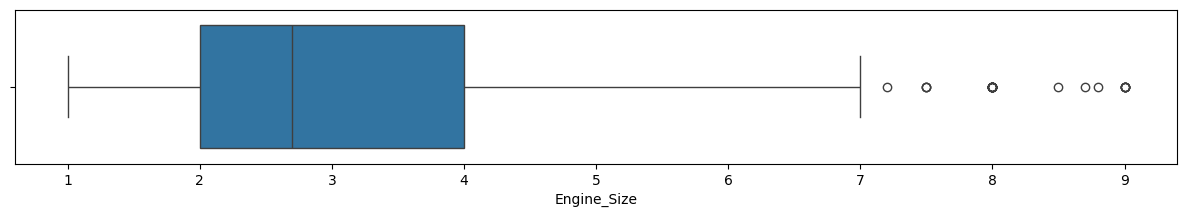

In [134]:
# Check the 'Engine_Size' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Engine_Size"])

In [135]:
find_anomalies(df_model['Engine_Size'])

IQR: 2.0
limit_bawah: -1.0
limit_atas: 7.0


In [136]:
# Sort the max 7 data of Engine_Size
df_model.sort_values(by='Engine_Size', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
59,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,15000
650,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,155000
5251,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,178000
2217,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,36000
1547,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,17000
3525,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,75000
600,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,240000


In [137]:
print("Count of data Engine_Size more than 90% percentile :",((df_model[df_model['Engine_Size'] > 5.3].count()['Engine_Size'])/3824)*100,"%")

Count of data Engine_Size more than 90% percentile : 9.388075313807532 %


Seperti yang bisa kita lihat: 
- Dari boxplot, outlier berada di sebelah kanan **- jadi kita mengurutkan & mengurutkan data maksimal dari Engine_Size**
- Kita dapat melihat outlier berada pada 7 sampai 9 dari Engine_Data. Tapi seperti yang kita ketahui, apakah mungkin ada mobil dengan Engine_Size seperti itu dengan Price seperti itu. (Mempertimbangkan variabel lain pada data tersebut). **- Dapat diterima**
- Tidak ada putaran / celah pada nilai 7 Max dari Ukuran_Mesin **- Dapat diterima**
- Nilai Maksimum mendekati rentang data 10% dari kumpulan data **- Variasi yang baik**

Kami masih menyimpan data mentah dari Variabel Engine_Size untuk menjaga model akurasi kami. Jadi kita tidak melakukan pemotongan pada variabel Engine_Size. . **Selain itu, Skewness mendekati nol

**- Mileage**

<Axes: xlabel='Mileage'>

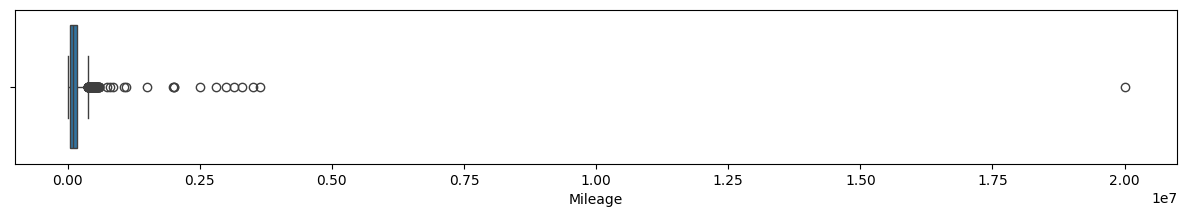

In [138]:
# Check the 'Mileage' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Mileage"])

In [139]:
find_anomalies(df_model['Mileage'])

IQR: 132000.0
limit_bawah: -149000.0
limit_atas: 379000.0


In [140]:
df_model['Mileage'].describe()

count       3750.0
mean      139819.0
std       370840.9
min          100.0
25%        49000.0
50%       103000.0
75%       181000.0
max     20000000.0
Name: Mileage, dtype: float64

In [141]:
# Sort the max 7 data of Mileage
df_model.sort_values(by='Mileage', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000
4193,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,30000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,10000
4548,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,27000
4875,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,20000
3387,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,17000
1334,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,35000


In [142]:
print("Count of data Mileage more than 90% percentile :",((df_model[df_model['Mileage'] > 284000.0].count()['Mileage'])/3824)*100,"%")

Count of data Mileage more than 90% percentile : 9.46652719665272 %


Seperti yang bisa kita lihat: 
- Dari boxplot di atas, pencilan berada di sebelah kanan **- jadi kita mengurutkan & menurunkan data maksimal dari Mileage** 
- Kita dapat melihat outlier (nilai ekstrim) ada di 2.00 le7 dengan Engine_Size 1.6 dan Price 9000. Kami berasumsi bahwa itu pasti outlier yang bisa jadi karena kesalahan manusia atau semacamnya. Karena Mileage antara 20000000 dengan 4500000 terlalu jauh **- Tidak Dapat Diterima**.
- Max Val memiliki rentang data yang mendekati 10% dari dataset **- Variasi yang baik**.

Jadi kami melakukan pemotongan pada Mileage lebih dari 4500000. **Selain itu, Skewness sangat jauh dari nol (Mileage Skew: 39.42234526124381*

**- Price**

<Axes: xlabel='Price'>

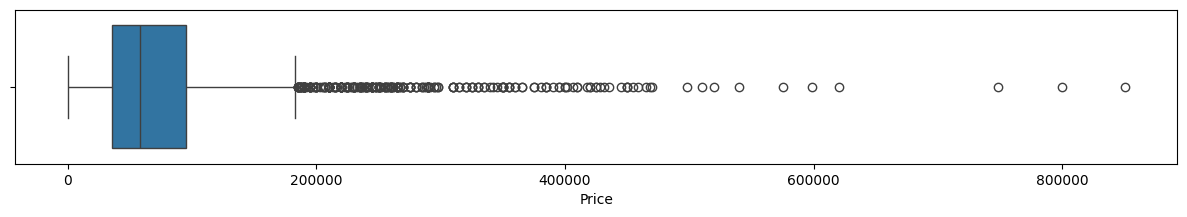

In [143]:
# Check the 'Price' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Price"])

In [144]:
# Outliers pada fitur price
find_anomalies(df_model['Price'])

IQR: 59000.0
limit_bawah: -52500.0
limit_atas: 183500.0


In [145]:
df_model['Price'].describe()

count     3750.0
mean     78898.6
std      72660.5
min          1.0
25%      36000.0
50%      58000.0
75%      95000.0
max     850000.0
Name: Price, dtype: float64

In [146]:
# Sort the max 7 data of Mileage
df_model.sort_values(by='Price', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
3561,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,575000
3105,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,540000


In [147]:
print("Count of data Price more than 90% percentile :",((df_model[df_model['Price'] > 153350].count()['Price'])/3824)*100,"%")

Count of data Price more than 90% percentile : 9.963389121338913 %


Seperti yang bisa kita lihat: 
- Dari boxplot di atas, pencilan ada di sebelah kanan **- jadi kita mengurutkan & mengurutkan data maksimum dari Price**
- Ada putaran / celah pada nilai 7 Min dari Price pada 1 hingga 500. *Berdasarkan pengetahuan, tidak mungkin menjual mobil bekas tahun 2019 dengan Price 1 dolar. dan kita dapat melihat bahwa Price min lainnya tampaknya memungkinkan untuk menjual pada variasi nilai tersebut berdasarkan variabel lain dari kumpulan data* **- Tidak Dapat Diterima**
- Tidak ada putaran / celah pada nilai 7 Price Maks **- Dapat Diterima**
- Baik Min dan Max Val memiliki rentang data yang mendekati 10% dari dataset **- Variasi yang Baik**

Berdasarkan [penelitian] (https://ksa.yallamotor.com/used-cars/pr_1000_10000?page=2&sort=updated_desc), tampaknya tidak realistis untuk menjual mobil bekas kurang dari 1000 Riyal

Jadi kami melakukan pemotongan Price kurang dari 1000. **Selain itu, Skewness sedikit jauh dari nol (3.096416044314816)*

**Berdasarkan Penelitian dan Pengetahuan**.

Setelah kita melihat outlier mana yang kita putuskan untuk dibuang dari dataset kita, kita juga harus memeriksa info dari web (market place) sehingga kita bisa melihat/mengetahui kisaran yang memungkinkan dan tidak memungkinkan untuk menjual mobil (berdasarkan Price, Mileage, Kisaran Year, dan lain-lain). Penelitian dan pengetahuan ini akan membawa kita pada ketepatan yang lebih baik dalam kehidupan nyata.

**[Source 1](https://ksa.yallamotor.com/used-cars/search)**
**[Source 2](http://p3nlhclust404.shr.prod.phx3.secureserver.net/SharedContent/redirect_0.html)**
**[Source 3](http://www.saudisale.com/SS_e_mpg.aspx)**

| **Variable** | **Range** |
| --- | --- |
| Price | > = 5000 |
| Mileage | < = 700000

### Drop the Outliers

Untuk rangkuman kami, kami telah menyesuaikan keputusan dan penelitian kami untuk mendapatkan kesimpulan dari analisis kami untuk pencilan:
- Jatuhkan Mileage lebih dari dan sama dengan 700.000
- Jatuhkan Price kurang dari dan sama dengan 5000

Text(0.5, 0, 'Range Selected Mileage')

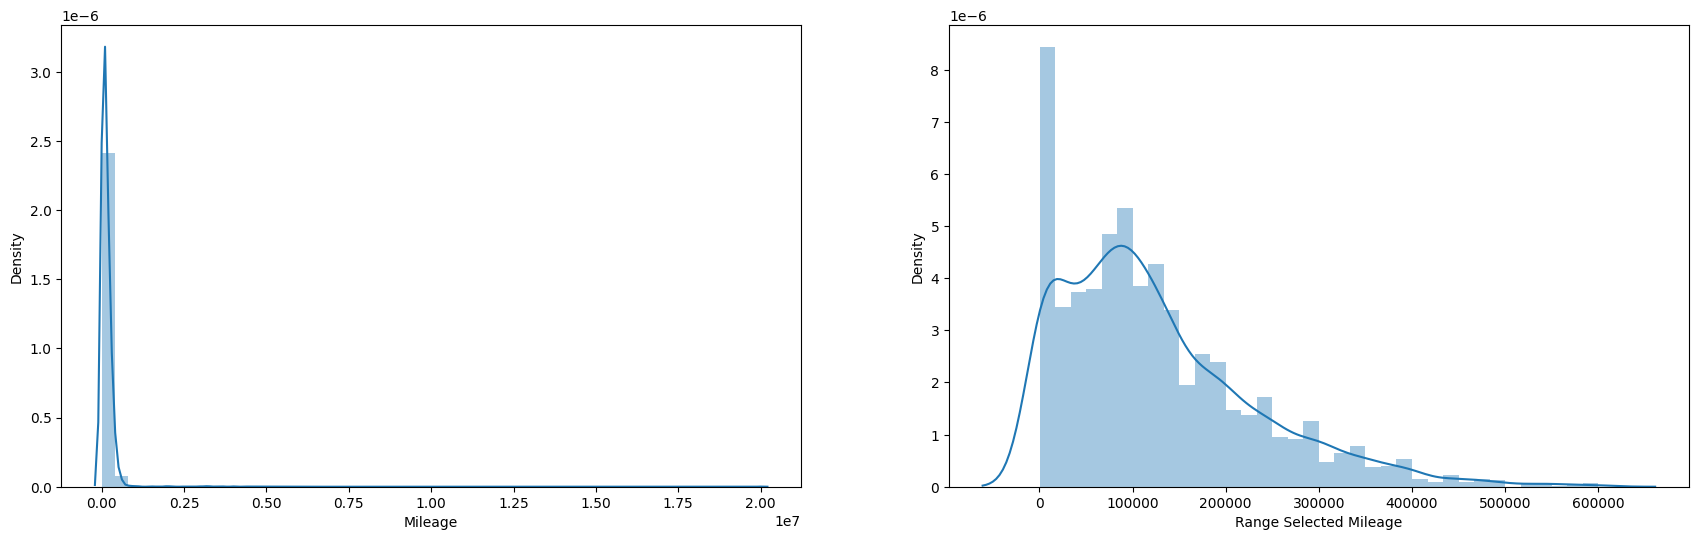

In [148]:
# Drop the Outliers Mileage
df_model = df_model[(df_model['Mileage'] <= 700000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage')

Text(0.5, 0, 'Range Selected Price')

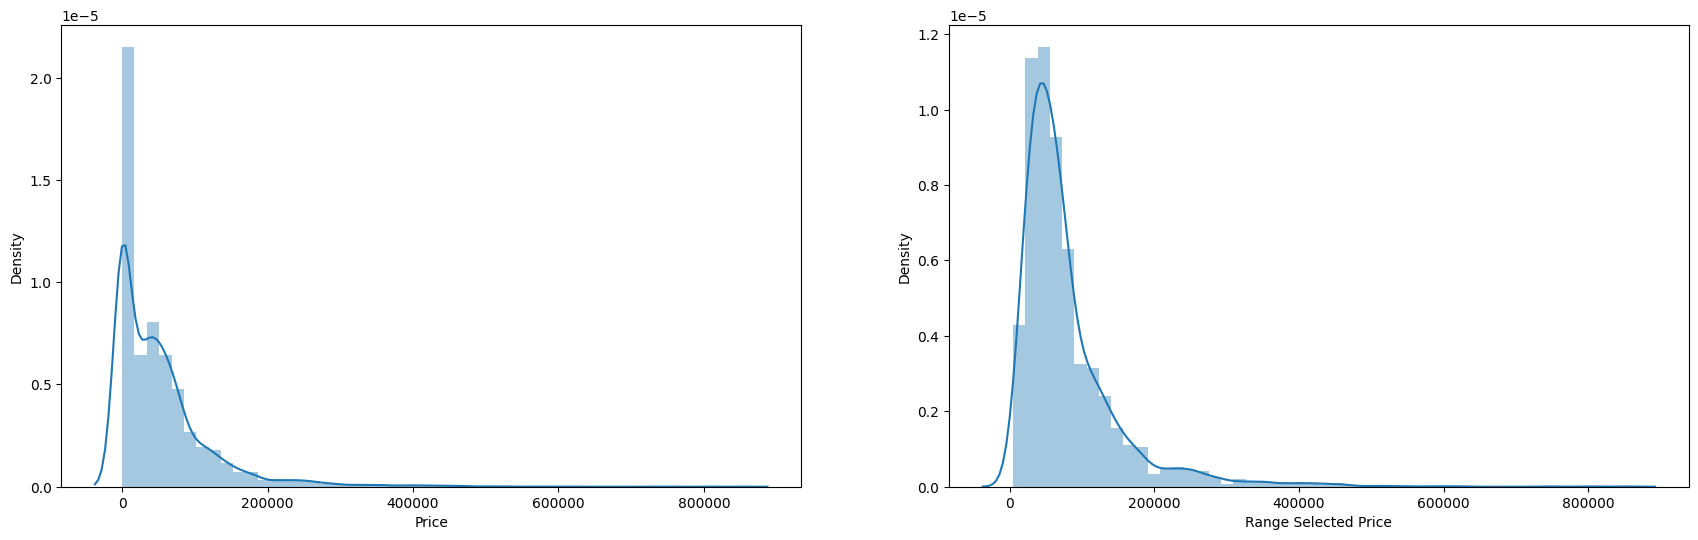

In [149]:
# Drop the Outliers Price
df_model = df_model[(df_model['Price'] >= 5000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

In [150]:
# Drop the Outliers

df_model = df_model[(df_model['Price'] >= 5000)]
df_model = df_model[(df_model['Mileage'] <= 700000)]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3667 entries, 3513 to 3482
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3667 non-null   object 
 1   Region       3667 non-null   object 
 2   Make         3667 non-null   object 
 3   Gear_Type    3667 non-null   object 
 4   Origin       3667 non-null   object 
 5   Options      3667 non-null   object 
 6   Year         3667 non-null   int64  
 7   Engine_Size  3667 non-null   float64
 8   Mileage      3667 non-null   int64  
 9   Price        3667 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 315.1+ KB


In [151]:
# Check Clean dataset
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000


## 4. Data Analysis

Pada langkah ini, kita akan menampilkan grafik untuk mencari informasi baik untuk variabel numerik maupun variabel kategorik. Dengan mencari informasi tersebut, kita dapat menganalisis dan memutuskan model apa yang akan kita gunakan. Memiliki informasi dan analisis yang baik akan membawa kita pada pengambilan keputusan yang lebih baik pada tahap selanjutnya

### Show the distribution data of each numerical variabel

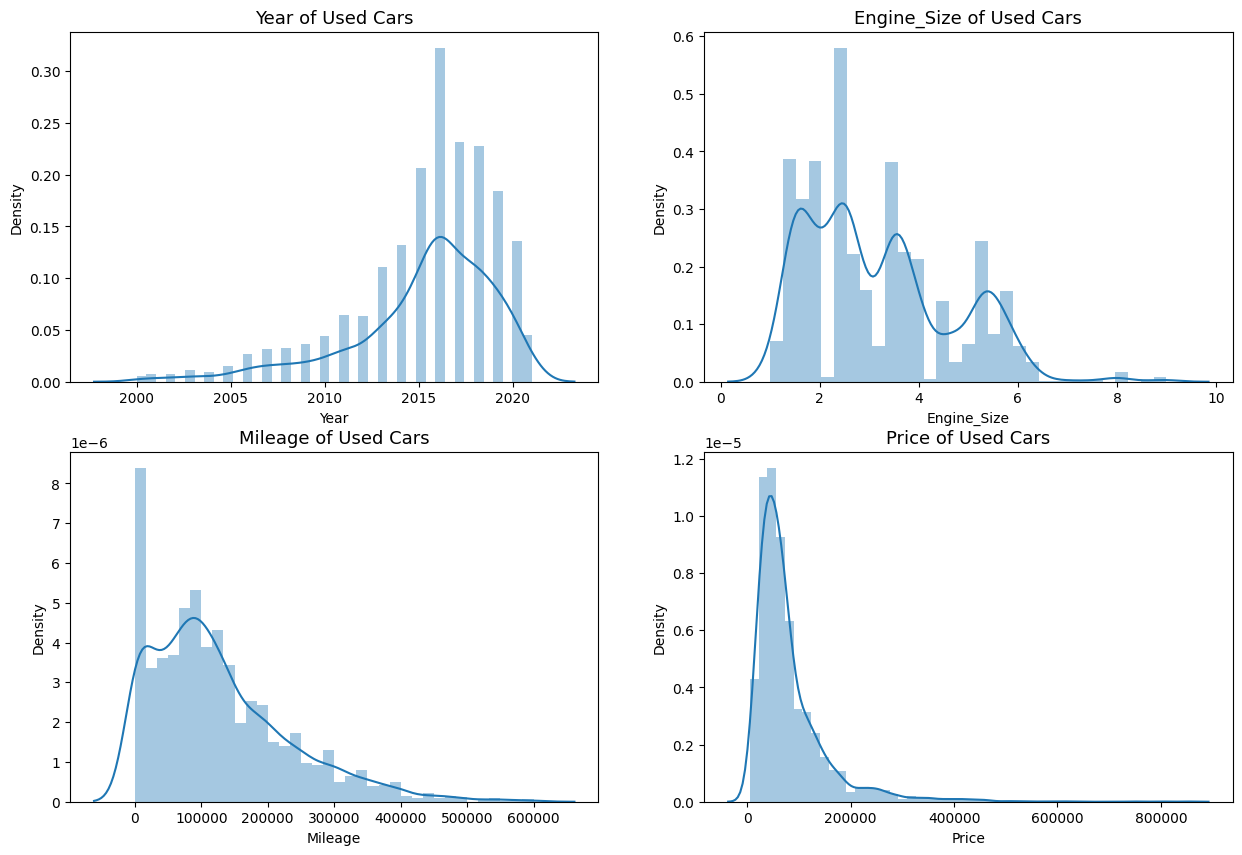

In [152]:
# Show distribution plot for each numerical variabel on dataset
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(df_model['Year'], kde=True)
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(df_model['Engine_Size'], kde=True)
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(df_model['Mileage'], kde=True)
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(df_model['Price'], kde=True)
plt.title('Price of Used Cars',fontsize=13)

plt.show()

Berdasarkan Distribution plot di atas, kita dapat melihat bahwa model kita memiliki berbagai macam Skewness. Skewness memberi tahu kita bahwa data mungkin memiliki pencilan (baik/buruk). Setelah kita menganalisisnya, kita dapat melihat bahwa ada perubahan pada dataset `Mileage` yang telah dibersihkan. Pada grafik `Mileage`, Skewness dan Kurtosis tidak lagi ekstrim. Dan kita dapat melihat bahwa kita memiliki data yang kaya karena ada banyak variasi pada set data bersih kita.

**View all categorical variables**

In [153]:
# View all categorical variables

categorical_columns = df_model.select_dtypes(include=['object'])
categorical_columns.head()

,Type,Region,Make,Gear_Type,Origin,Options
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full
4684,G,Riyadh,Mercedes,Automatic,Other,Full
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full


<Axes: xlabel='Gear_Type', ylabel='Price'>

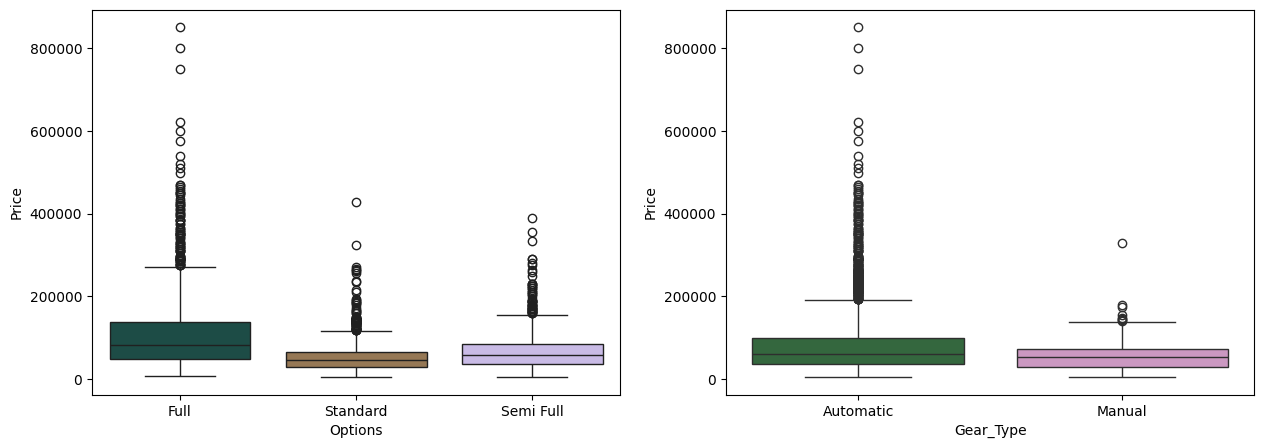

In [154]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df_model.Options, y=df_model.Price, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(x=df_model.Gear_Type, y=df_model.Price, palette=("cubehelix"))

Insights :
- Opsi Full memiliki penyebaran Price yang lebih tinggi dibandingkan dengan yang lain
- Gear_Type Otomatis memiliki penyebaran Price yang lebih tinggi dibandingkan dengan yang lain

<Figure size 1500x700 with 0 Axes>

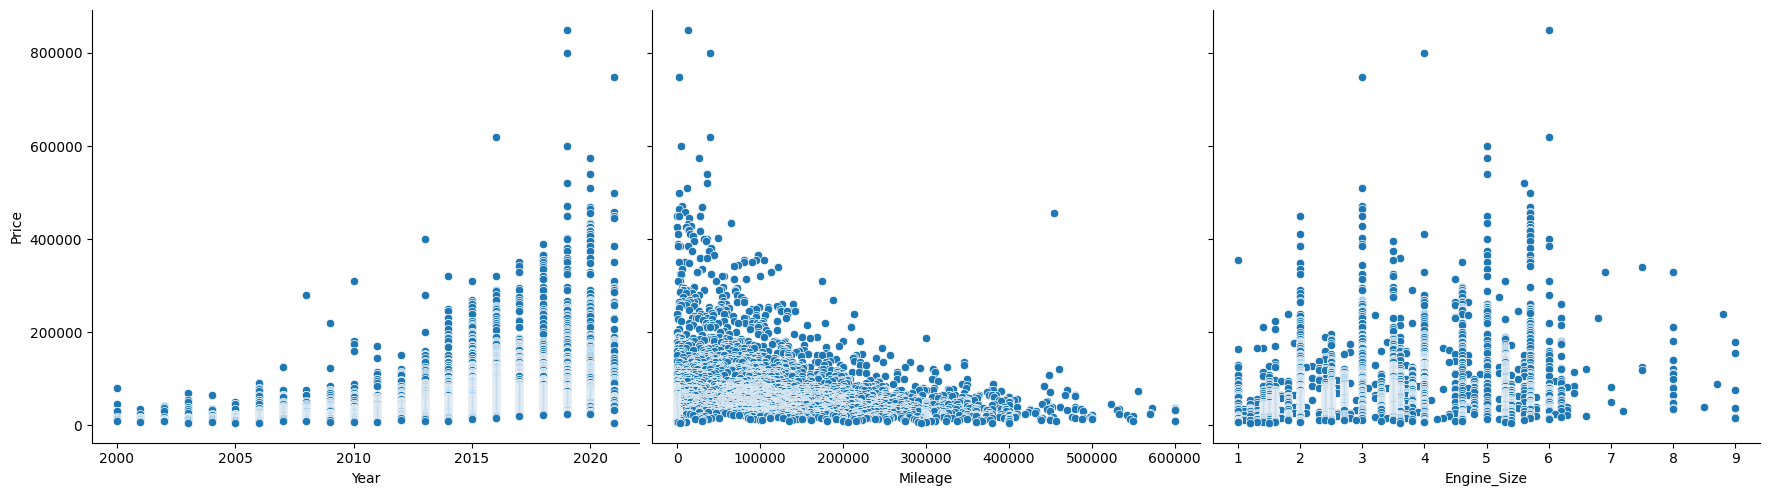

In [155]:
plt.figure(figsize=(15, 7))
sns.pairplot(df_model, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

Insights :
- Tahun pembuatan tampaknya memiliki korelasi positif dengan Price
- Mileage tampaknya memiliki korelasi negatif dengan Price
- Engine_Size memiliki korelasi seminggu dengan Price

**Data Correlation**

In [156]:
df_model_num = df_model.apply(pd.to_numeric, errors='coerce')
df_model_num = df_model_num.dropna(axis=1)
corr = df_model_num.corr(method='pearson')

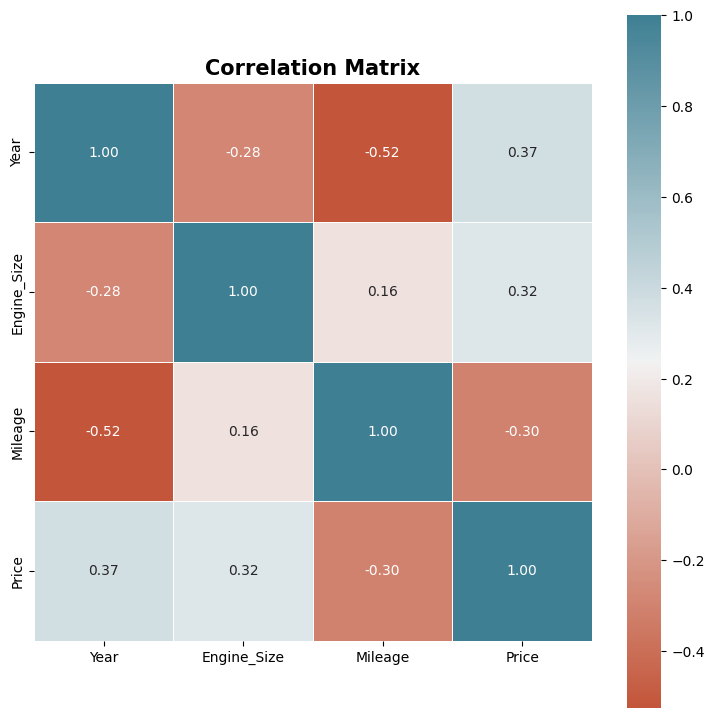

In [157]:
plt.figure(figsize=(9, 9))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Seperti yang dapat kita lihat pada Matriks Korelasi, terdapat korelasi yang tinggi antara `Mileage` dan `Year`, hal ini dikarenakan Mileage akan terus meningkat dari tahun ke tahun. Kita juga dapat melihat bahwa `Price` lebih bergantung pada `Tahun` dan `Ukuran Mesin`.

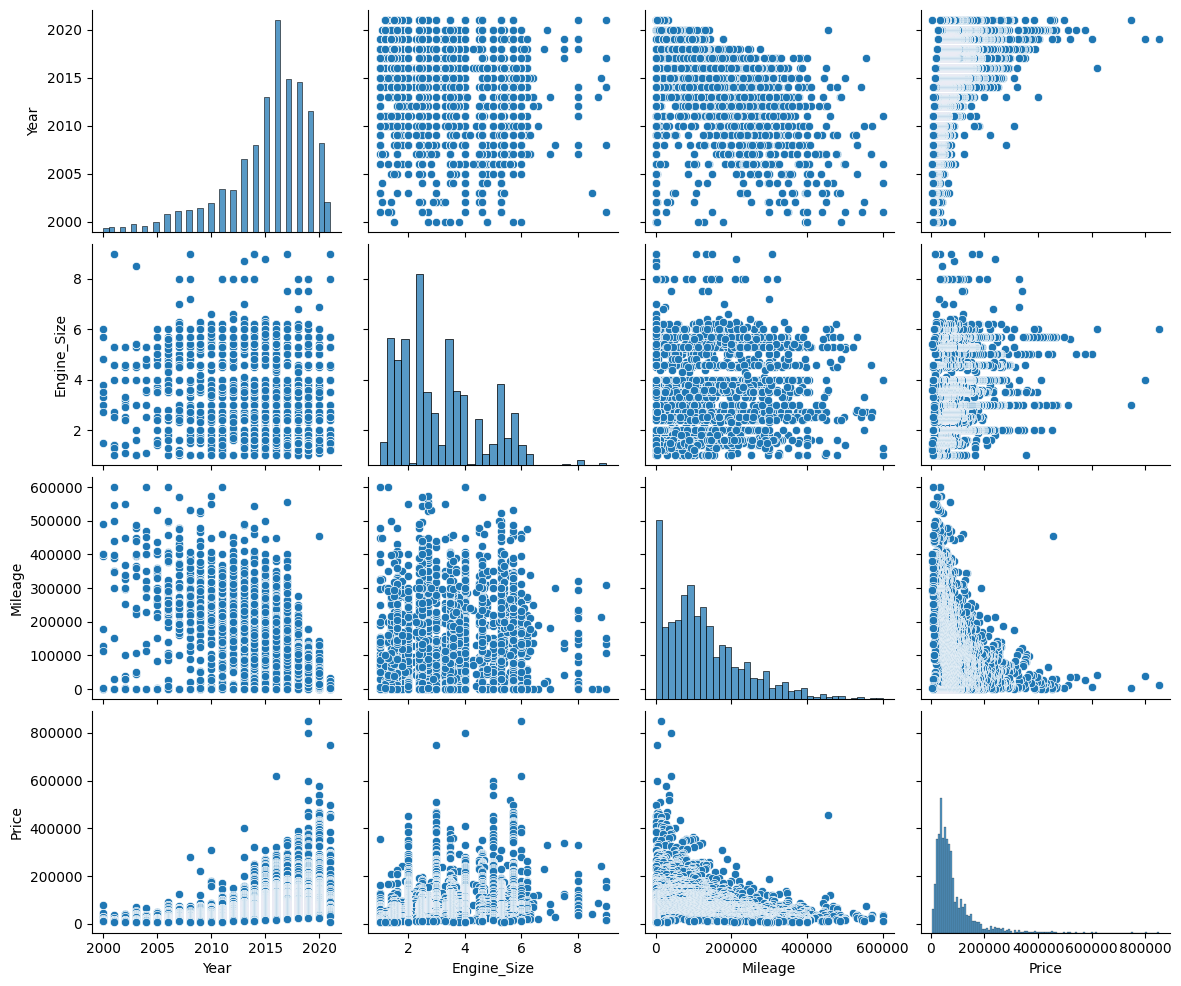

In [158]:
# Pairplot all the numerical variabel
sns.pairplot(df_model[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

## 5. Feature Engineering

Rekayasa fitur adalah teknik pembelajaran mesin yang memanfaatkan data untuk membuat variabel baru yang tidak ada dalam set pelatihan. Teknik ini dapat menghasilkan fitur baru atau tidak, dengan tujuan untuk menyederhanakan dan mempercepat transformasi data sekaligus meningkatkan akurasi model.

In [160]:
#Select the necessary data on dataset
df_fe = df_model[['Make','Year', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [161]:
df_fe

,Make,Year,Options,Engine_Size,Gear_Type,Mileage,Price
3513,Bentley,2019,Full,6.0,Automatic,13000,850000
4684,Mercedes,2019,Full,4.0,Automatic,39000,800000
4273,Mercedes,2021,Full,3.0,Automatic,2500,748000
2120,Rolls-Royce,2016,Full,6.0,Automatic,40000,620000
4653,Land Rover,2019,Full,5.0,Automatic,4200,599000
...,...,...,...,...,...,...,...
5432,Kia,2006,Standard,1.3,Manual,290000,6000
1629,Other,2021,Semi Full,1.2,Manual,3000,5500
3052,Ford,2003,Semi Full,5.4,Automatic,400000,5000
693,Hyundai,2005,Standard,1.5,Manual,294602,5000


**Encoding**

Encoding adalah proses memasukkan urutan karakter (huruf, angka, tanda baca, dan simbol-simbol tertentu) ke dalam suatu format khusus agar dapat diproses/dimengerti oleh aplikasi lain. Karena kita menggunakan variabel kategorikal pada model kita, maka kita harus meng-encode variabel kategorikal ini menjadi numerik terlebih dahulu agar fungsi dapat memproses variabel kategorikal kita.

In [162]:
df_fe.nunique()

Make             55
Year             22
Options           3
Engine_Size      64
Gear_Type         2
Mileage        1287
Price           402
dtype: int64

Sebagai pengetahuan dan berdasarkan korelasi, kami akan mengkodekan (dummy) data kategori kami yang memiliki korelasi dengan Price mobil seperti Options, Gear_Type dan Make. Fitur-fitur ini didasarkan pada pengetahuan kami
- Price mobil sangat bergantung pada Option baik itu Full, Semi Full atau standar
- Gear_Type mobil sangat berpengaruh pada Price mobil itu sendiri. Umumnya, mobil matic lebih mahal daripada tipe manual.
- Seperti yang kita ketahui, Price mobil tergantung pada mereknya, karena kita berharap bahwa merek yang bagus akan memberikan nilai lebih pada sebuah Price.

Berdasarkan alasan tersebut, kami memutuskan untuk membuat dummy pada Options, Gear_Type dan Make

In [163]:
# Dummies the variable that might have a best correlation
cat_col = ['Options', 'Gear_Type', 'Make']
dummies = pd.get_dummies(df_fe[cat_col])
dummies.shape

(3667, 60)

In [164]:
df_fe = pd.concat([df_fe, dummies], axis = 1)
df_fe.shape

(3667, 67)

In [165]:
# Drop the original cat variables as dummies are already created

df_fe.drop(cat_col, axis = 1, inplace = True)
df_fe.shape

(3667, 64)

In [166]:
df_fe.head()

,Year,Engine_Size,Mileage,Price,Options_Full,Options_Semi Full,Options_Standard,Gear_Type_Automatic,Gear_Type_Manual,Make_Aston Martin,...,Make_Peugeot,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Suzuki,Make_Toyota,Make_Victory Auto,Make_Volkswagen,Make_Zhengzhou,Make_Škoda
3513,2019,6.0,13000,850000,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4684,2019,4.0,39000,800000,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4273,2021,3.0,2500,748000,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2120,2016,6.0,40000,620000,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4653,2019,5.0,4200,599000,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## 6. Modeling

Pada tahapan ini akan dilakukan proses:
1. Scalling,  transformasi terhadap data numerik agar antar variabel memiliki skala yang sama
2. Encoding, agar variable kategorik pada dapat direpresentasikan dalam machine learning
3. Modelling

In [167]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


**Encoding**

Berdasarkan data yang tersedia, terdapat 6 variabel kategorikal. Jika kita ingin menggunakan seluruh fitur tersebut, kita perlu melakukan encoding. Pemilihan metode encoding dapat didasarkan pada skala pengukuran data, apakah nominal (numerik) atau ordinal (memiliki urutan tertentu saat diurutkan). Pada tahap ini, kita akan melakukan encoding sebagai berikut:

1. One-Hot Encoding: untuk variabel Gear_Type, Origin, dan Options.
2. Binary Encoding: untuk variabel Type, Region, dan Make.

Kita dapat menggunakan ColumnTransformer untuk mengubah tipe data variabel-variabel tersebut, sehingga nantinya dapat diaplikasikan dalam pipeline model.

In [168]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

In [169]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Price'], axis=1)
y = df_model['Price']

**Train and Test Splitting**

In [170]:
# Splitting data into training and test with propotion 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=42)

**Choose a Benchmark Model**

In [171]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=10, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-39795.26515697 -42933.45328184 -43554.21263766 -57715.15497093
 -47153.23689897 -57105.53719321 -51702.96602887 -38106.43326748
 -62424.5644655  -41518.2342393 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-21694.92070941 -24947.50064224 -25262.41355612 -30377.01152636
 -26665.92965777 -26367.6534402  -24442.31102161 -22765.15910483
 -30268.52854596 -24917.12822976] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.31587577 -0.30075056 -0.3404294  -0.3513854  -0.37601177 -0.30341985
 -0.33696891 -0.39904827 -0.35616063 -0.33259149] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-33259.85489646 -39839.20079044 -39509.31297889 -43322.38797419
 -37073.27769011 -56960.61388686 -53698.6896905  -36836.5779838
 -52160.47476451 -38173.

In [172]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-48200.9,8074.9,-25770.9,2677.3,-0.3,0.0
1,KNN Regressor,-43083.4,7789.5,-23760.4,1692.0,-0.4,0.0
2,DecisionTree Regressor,-46633.8,7947.6,-23115.0,2667.3,-0.3,0.0
3,RandomForest Regressor,-35129.1,6639.9,-16825.1,1454.9,-0.2,0.0
4,XGBoost Regressor,-30946.1,3052.1,-15740.6,926.5,-0.2,0.0


- Hasil Evaluasi dari kelima model diatas menunjukkan nilai RMSE dan MAE memiliki perbedaan yang cukup signifikan. Hal tersebut dikarenakan RMSE menghitung nilai residual yang dikuadratkan terlebih dahulu sehingga memberikan 'weight' yang lebih tinggi untuk nilai error yang besar
- Dalam pemilihan kandidat model yang akan digunakan kita dapat melihat pada nilai RMSE, MAE dan MAPE paling rendah
- Dengan demikian RandomForest Regressor dan XGBoost Regressor akan dilakukan benchmark  serta akan dilakukan prediksi menggunakan test set untuk kedua model tersebut

In [173]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,37913.7,19293.7,0.3
RandomForest,38252.6,20143.9,0.3


Tabel diatas menunjukkan bahwa prediksi menggunakan XGBoost memiliki peforma yang lebih baik dengan memiliki nilai yang lebih rendah dibangin RandomForest

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [174]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [175]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [176]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(bas...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [177]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
26,0.4,0.0,0.0,0.0,0.4,1.3,100,7,0.1,1,...,918.6,2,-0.3,-0.3,-0.2,-0.4,-0.2,-0.3,0.0,1
18,0.4,0.0,0.0,0.0,0.2,0.1,193,8,0.1,4,...,403.3,3,-0.3,-0.3,-0.3,-0.4,-0.3,-0.3,0.0,3
39,1.1,0.1,0.0,0.0,0.6,0.1,141,10,0.0,10,...,449.5,1,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,0.0,2
8,0.2,0.0,0.0,0.0,0.4,0.0,166,5,0.2,2,...,551.3,7,-0.3,-0.3,-0.3,-0.4,-0.3,-0.3,0.0,9
29,0.4,0.0,0.0,0.0,0.9,10.0,138,6,0.1,6,...,593.3,5,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,0.0,4


In [178]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -32847.50081877307
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.06, 'model__gamma': 1, 'model__colsample_bytree': 0.7}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [180]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,34743.5,18176.0,0.3


In [181]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,37913.7,19293.7,0.3


etelah dilakukannya hyperparameter tuning, terjadi penurunan nilai RMSE sebesar 8%, MAE sebesar 6%, dengan MAPE cenderung kecil.

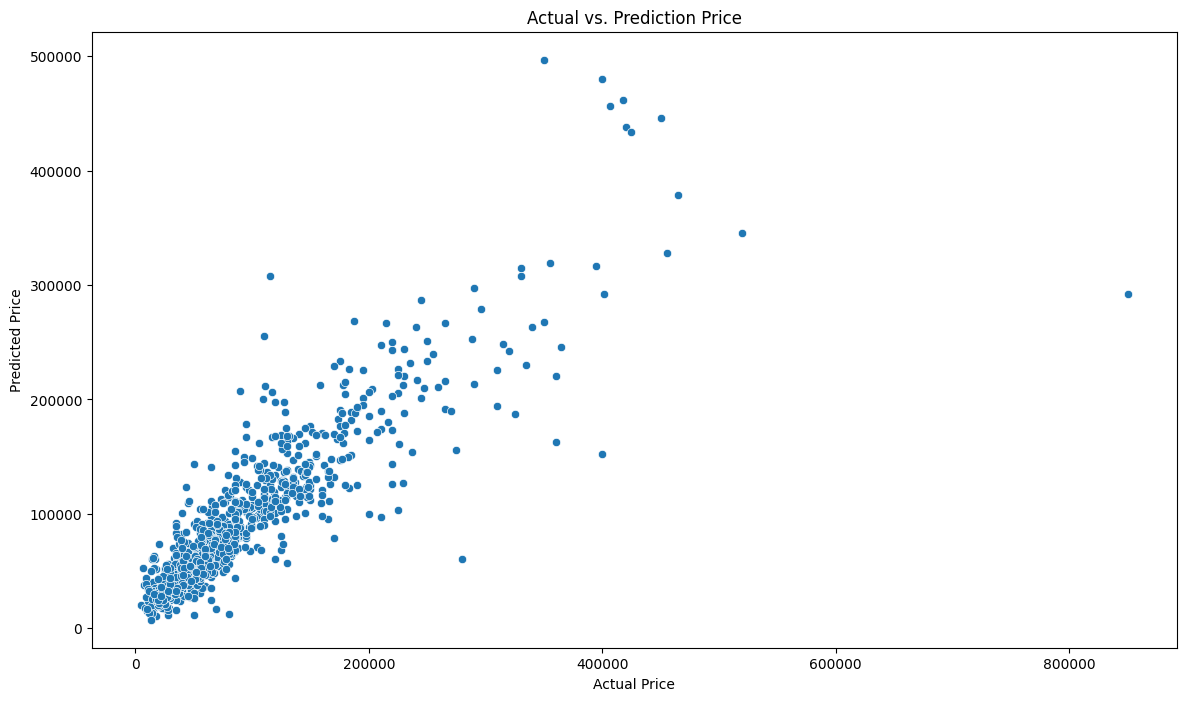

In [182]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Bisa dilihat dari grafik diatas memandingkan nilai dari actual *Price* nilai prediksi menggunaka XGBoost model dan parameter yang telah di tuning. 

**Insight**:

- Model yang dihasilkan tergolong cukup baik dan linear, dimana terlihat dari grafik di atas serta menghasilkan nilai small error metric values,(RMSE, MAE, MAPE).
- Beberapa nilai actual price yang rendah di atas jika dibandingkan dengan nilai predicted price mengalami error, hal ini disebabkan karena banyaknya data dengan nilai **Price** yang rendah.
- Ketika Price more than 200000, distribusi plot mulai irregular. Kita dapat melihat bahwa kadang-kadang kita mempunyai harga yang diprediksi tinggi dan kadang-kadang rendah setelah 200000.

Berikut ini adalah parameter yang sangat mempengaruhi penentuan nilai **Price** pada model.

In [183]:
df_model.describe()

,Year,Engine_Size,Mileage,Price
count,3667.0,3667.0,3667.0,3667.0
mean,2015.3,3.2,126990.9,80494.7
std,3.9,1.5,105788.7,72635.9
min,2000.0,1.0,100.0,5000.0
25%,2014.0,2.0,49577.0,37500.0
50%,2016.0,2.7,104000.0,60000.0
75%,2018.0,4.0,181000.0,95000.0
max,2021.0,9.0,600000.0,850000.0


**Feature Importances**

Untuk melakukan seleksi terhadap fitur-fitur yang memang penting atau berpengaruh terhadap target variabel

<Axes: title={'center': 'Feature Importances'}>

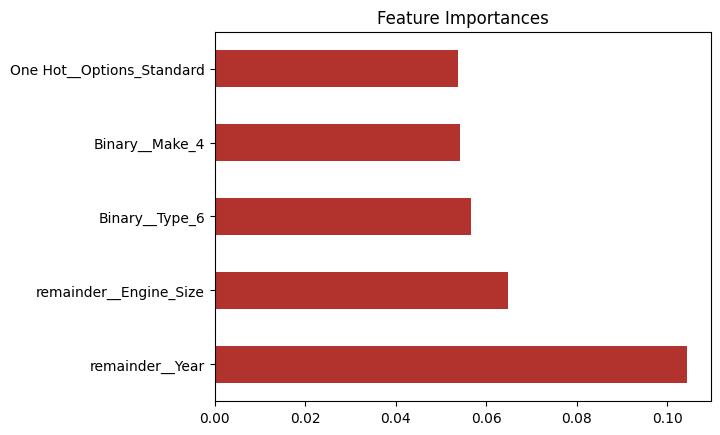

In [184]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances', color='#b2322e')

Kita bisa lihat di atas *Make*, *Year*, dan *Engine_Size* Variabel yang sangat mempengaruhi model.

### **Conclusion**

Dalam proyek ini, kita telah membangun sebuah model untuk memprediksi harga mobil bekas dengan beberapa kriteria yang telah ditentukkan di atas, dimana model ini dapat menjadi informasi pendukung yang berguna dalam menentukan harga jual dan beli mobil bekas bagi perusahaan maupun individu yang melakukan transaksi.


- Model terbaik yang digunakan disini adalah XGBoost Regressor.
- Hasil dari model menunjukkan bahwa fitur-fitur yang paling signifikan pengaruhnya adalah Make, Year dan Engine Size. 
- Performa model regresi dievaluasi menggunakan metrik RMSE (Root Mean Square Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error) dan R-Squared . Setelah melalui proses hyperparameter tuning, model yang dihasilkan tergolong cukup baik dan linear (XGBoost) dimana menghasilkan nilai small error metric values,(RMSE, MAE, MAPE) dan nilai R2 hampir mendekati 1.
- Nilai RMSE memiliki makna bahwa ketika model digunakan untuk memprediksi harga mobil bekas, perkiraan harga rata-ratanya dapat memiliki selisih sekitar 34.743,5 Riyal (RMSE) atau 18.176 (MAE) dari harga actual. Sedangkan nilai MAPE yang dihasilkan 0.3 yang menunjukkan error absolut pada Price yang diprediksi oleh model. Semakin kecil nilai MAPE berarti nilai taksiran semakin mendekati nilai sebenarnya.
- Ketika Price more than 200000, distribusi plot mulai irregular. Kita dapat melihat bahwa kadang-kadang kita mempunyai harga yang diprediksi tinggi dan kadang-kadang rendah setelah 200000.

Model yang diperoleh masih memiliki potensi untuk ditingkatkan melalui proses-proses tertentu. Namun, untuk saat ini, kami berasumsi bahwa model sudah mencapai hasil yang diharapkan. Selain itu, dalam proses pembuatan model, diperlukan pengetahuan yang mendalam mengenai industri mobil untuk dapat mengembangkan pengembangan model yang lebih baik lagi.

### **Recommendation** 

Berikut ini adalah beberapa rekomendasi yang dapat dilakukan untuk meningkatkan performa model:

1. Menambahkan fitur yang mengkategorikan jenis mobil menjadi classic atau non-classic. Hal ini penting karena harga mobil bekas terhadap mileage dan tahun pembuatan dapat berbeda secara signifikan antara mobil-mobil classic dan mobil-mobil biasa. Dengan memasukkan fitur ini ke dalam model, kemungkinan besar akan meningkatkan akurasi prediksi harga mobil bekas.

2. Melakukan analisis terhadap nilai error tertinggi yang dihasilkan oleh model, dengan mengelompokkan error menjadi 3 kategori, yaitu overestimation (5%), underestimation (5%), dan mayoritas yang memiliki error mendekati nilai mean (90%). Setelah itu, dilakukan pemeriksaan hubungan antara error tersebut dengan setiap variabel independen. Dengan demikian, dapat dilakukan proses training ulang dan menghindari variabel yang menyebabkan error tinggi.

3. Jika tersedia tambahan data yang signifikan, dapat mencoba menggunakan model yang lebih kompleks seperti recursive neural networks (RNN). Namun, perlu diperhatikan bahwa jika jumlah data dan fitur masih sebatas dataset yang ada saat ini, kemungkinan peningkatan performa model secara signifikan dengan menggunakan model yang lebih kompleks tidak terlalu besar.

#### **Save Model**

In [185]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_SaudiUsedCar_XGB.sav', 'wb'))